# Brain MRI Images for Brain Tumor Detection

This assignment demonstrates training a simple Convolutional Neural Network (CNN) to classify images.


dataset: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/data

### Dataset Import and Preparation


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.9 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow as keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
from datasets import load_dataset
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
!pip install -q kaggle

# Allocate read and write permissions to the file
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset from kaggle
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

# Unzip the dataset
!unzip brain-mri-images-for-brain-tumor-detection.zip

import os
print(os.listdir('brain_tumor_dataset'))

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
 86% 13.0M/15.1M [00:01<00:00, 14.1MB/s]
100% 15.1M/15.1M [00:01<00:00, 8.59MB/s]
Archive:  brain-mri-images-for-brain-tumor-detection.zip
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/n

In [ ]:
df = load_dataset('brain_tumor_dataset')

Resolving data files:   0%|          | 0/253 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

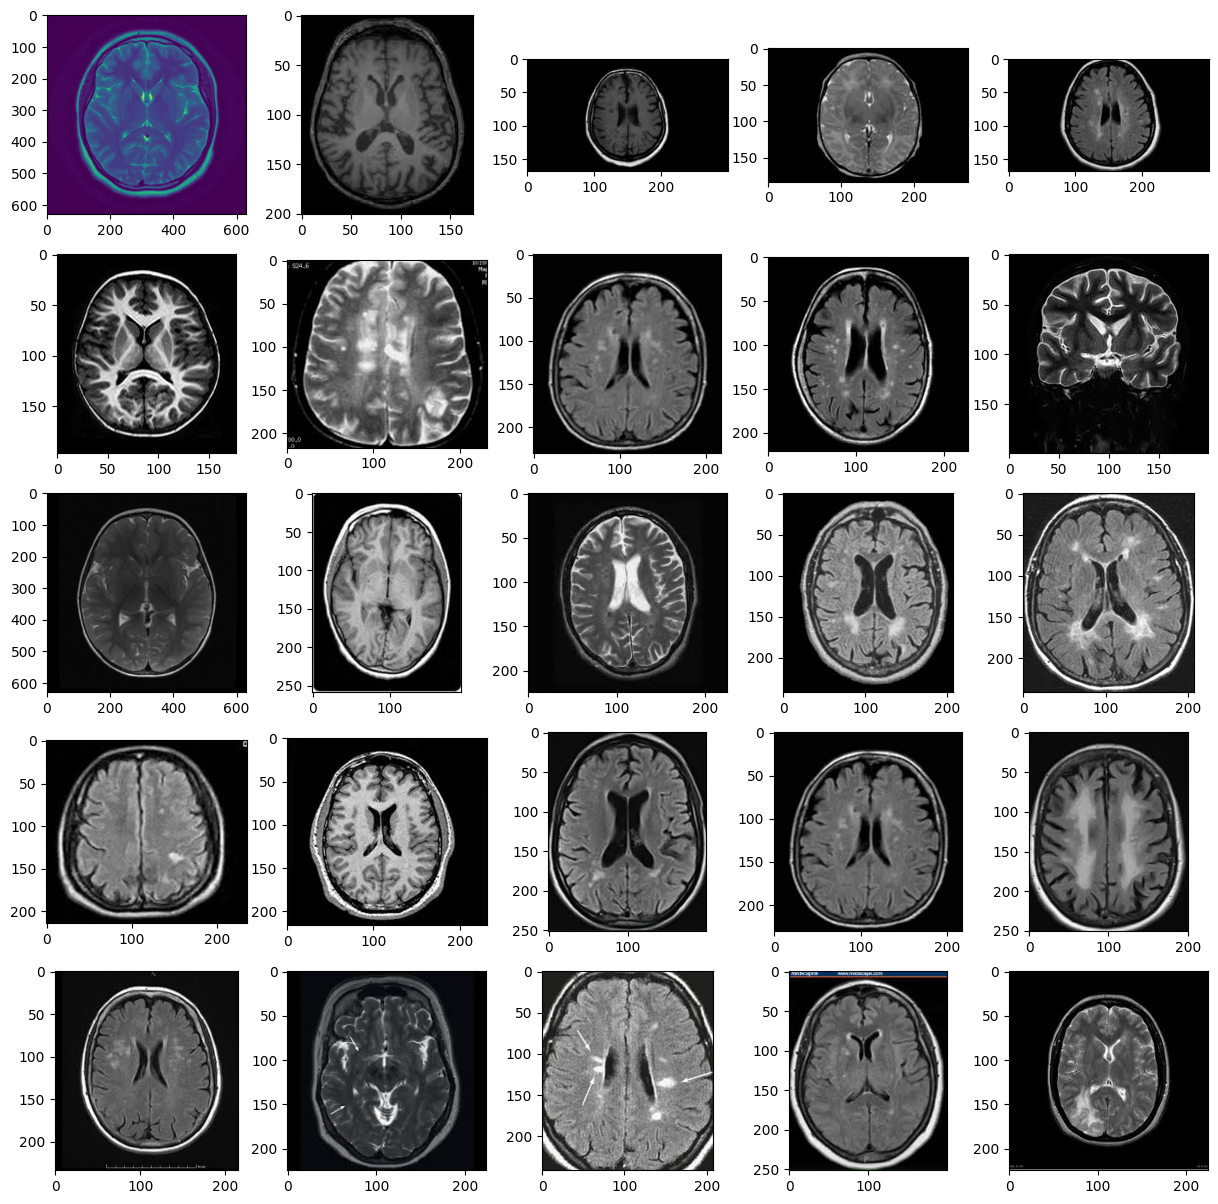

In [ ]:
import matplotlib.pyplot as plt

images = df['train']['image']

# Show the first 25 images in a 5x5 grid
rows = 5
cols = 5
num_images = rows * cols

fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
for i in range(num_images):
    row = i // cols
    col = i % cols
    axes[row, col].imshow(images[i])
    axes[row, col].axis()

plt.show()

In [ ]:
# Resize images to 32x32
resized_images = []
for image in images:
    # Convert the PIL Image to a NumPy array
    image_np = np.array(image)
    # Check if the image has 3 dimensions (height, width, channels)
    if image_np.ndim == 2:
        # If the image is grayscale, add a channel dimension
        image_np = image_np[..., np.newaxis] # Add channel dimension to the last axis
    # Ensure all images have 3 channels
    if image_np.shape[-1] != 3:
        # Stack the image to create 3 channels if not already present
        image_np = np.stack([image_np[..., 0]] * 3, axis=-1)
    # Resize the image using TensorFlow
    resized_image = tf.image.resize(image_np, [32, 32])
    resized_images.append(resized_image)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Assuming resized_images is a list of preprocessed images
# and corresponding labels are in df['train']['label']

# Convert the list of resized images to a NumPy array
resized_images_np = np.array(resized_images)

# Ensure labels has the same length as resized_images_np
# Assuming df['train'] has the same length as resized_images
labels = df['train']['label']

# Check if labels is shorter than resized_images_np
if len(labels) < len(resized_images_np):
    print(f"Warning: labels has {len(labels)} elements, while resized_images_np has {len(resized_images_np)} elements.")
    print("Extending labels with zeros to match the length of resized_images_np.")
    # Extend labels with zeros to match the length of resized_images_np
    labels = np.concatenate([labels, np.zeros(len(resized_images_np) - len(labels), dtype=int)])  # Add channel dimension to the last axis

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    resized_images_np, labels, test_size=0.20, random_state=42  # Add random_state for reproducibility
)

# Now you have train_images, test_images, train_labels, and test_labels
# which you can use for training and evaluating your model.

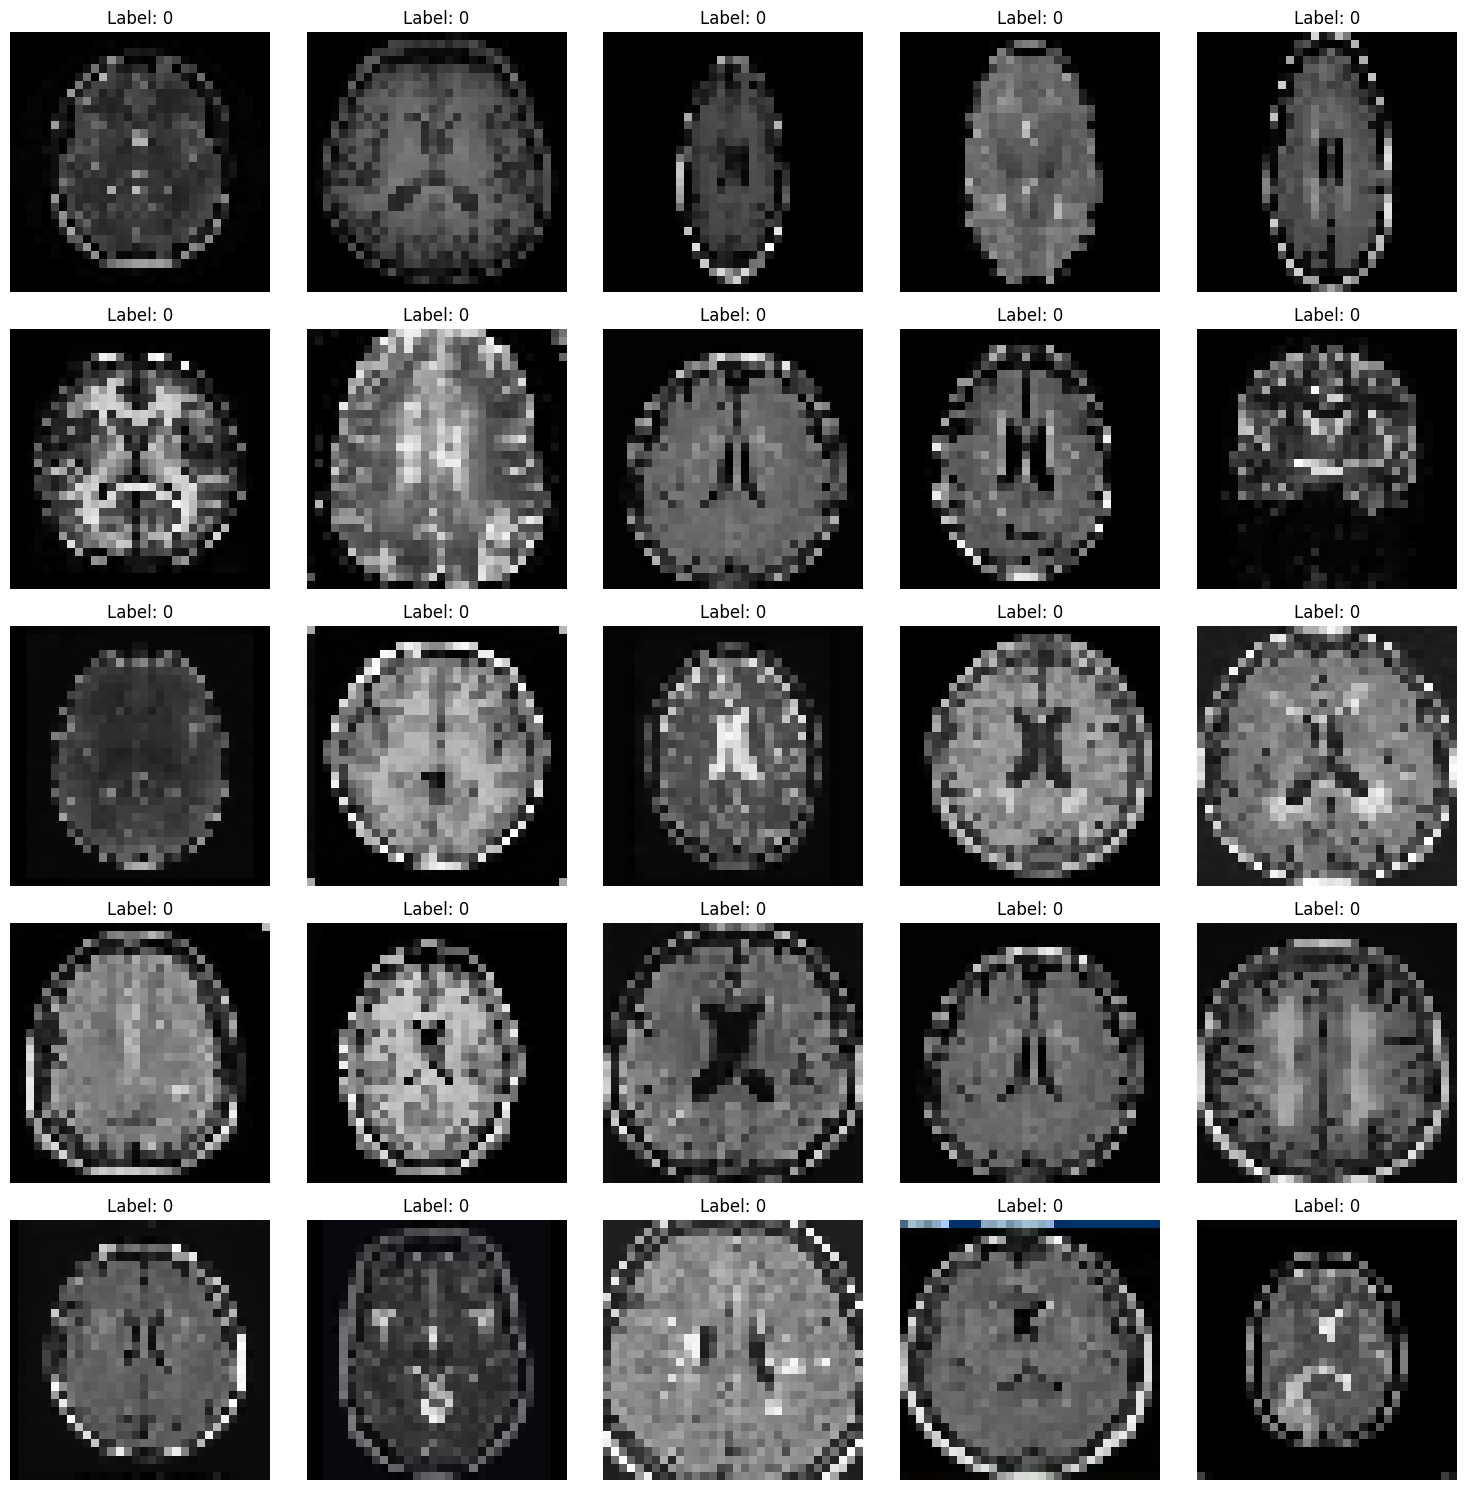

In [ ]:
# prompt: Show the first 25 resized images in a 5x5 grid with their labels

# Show the first 25 resized images in a 5x5 grid with their labels
rows = 5
cols = 5
num_images = rows * cols

fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
for i in range(num_images):
    row = i // cols
    col = i % cols
    axes[row, col].imshow(resized_images_np[i].astype(np.uint8))  # Convert to uint8 for display
    axes[row, col].set_title(f"Label: {labels[i]}") # Set the title to display the corresponding label
    axes[row, col].axis('off') # Hide axis

plt.tight_layout() # Adjust layout to prevent overlapping titles
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Convert train_images and train_labels to NumPy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

#Convert test_images and test_labels to NumPy arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 693ms/step - accuracy: 0.2602 - loss: 20.1469 - val_accuracy: 0.7451 - val_loss: 1.2277
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6074 - loss: 1.4651 - val_accuracy: 0.7059 - val_loss: 1.0582
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7252 - loss: 0.7030 - val_accuracy: 0.7255 - val_loss: 0.7062
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8064 - loss: 0.5326 - val_accuracy: 0.8431 - val_loss: 0.6402
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8155 - loss: 0.3986 - val_accuracy: 0.8431 - val_loss: 0.6470
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8167 - loss: 0.3817 - val_accuracy: 0.8431 - val_loss: 0.7509
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8418 - loss: 0.3429 - val_accuracy: 0.8235 - val_loss: 0.5434
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8646 - loss: 0.2026 - val_accuracy: 0.8431 - val_loss: 0.6536
E

2/2 - 0s - 11ms/step - accuracy: 0.8431 - loss: 0.5823


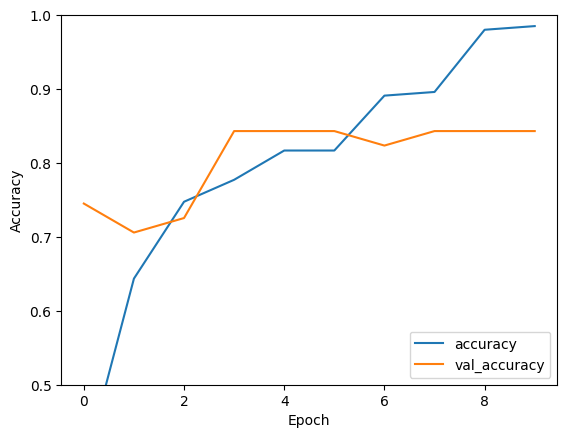

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

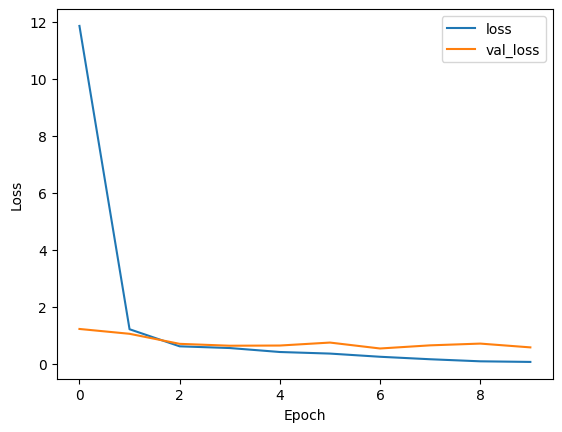

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
print(test_acc)

0.843137264251709


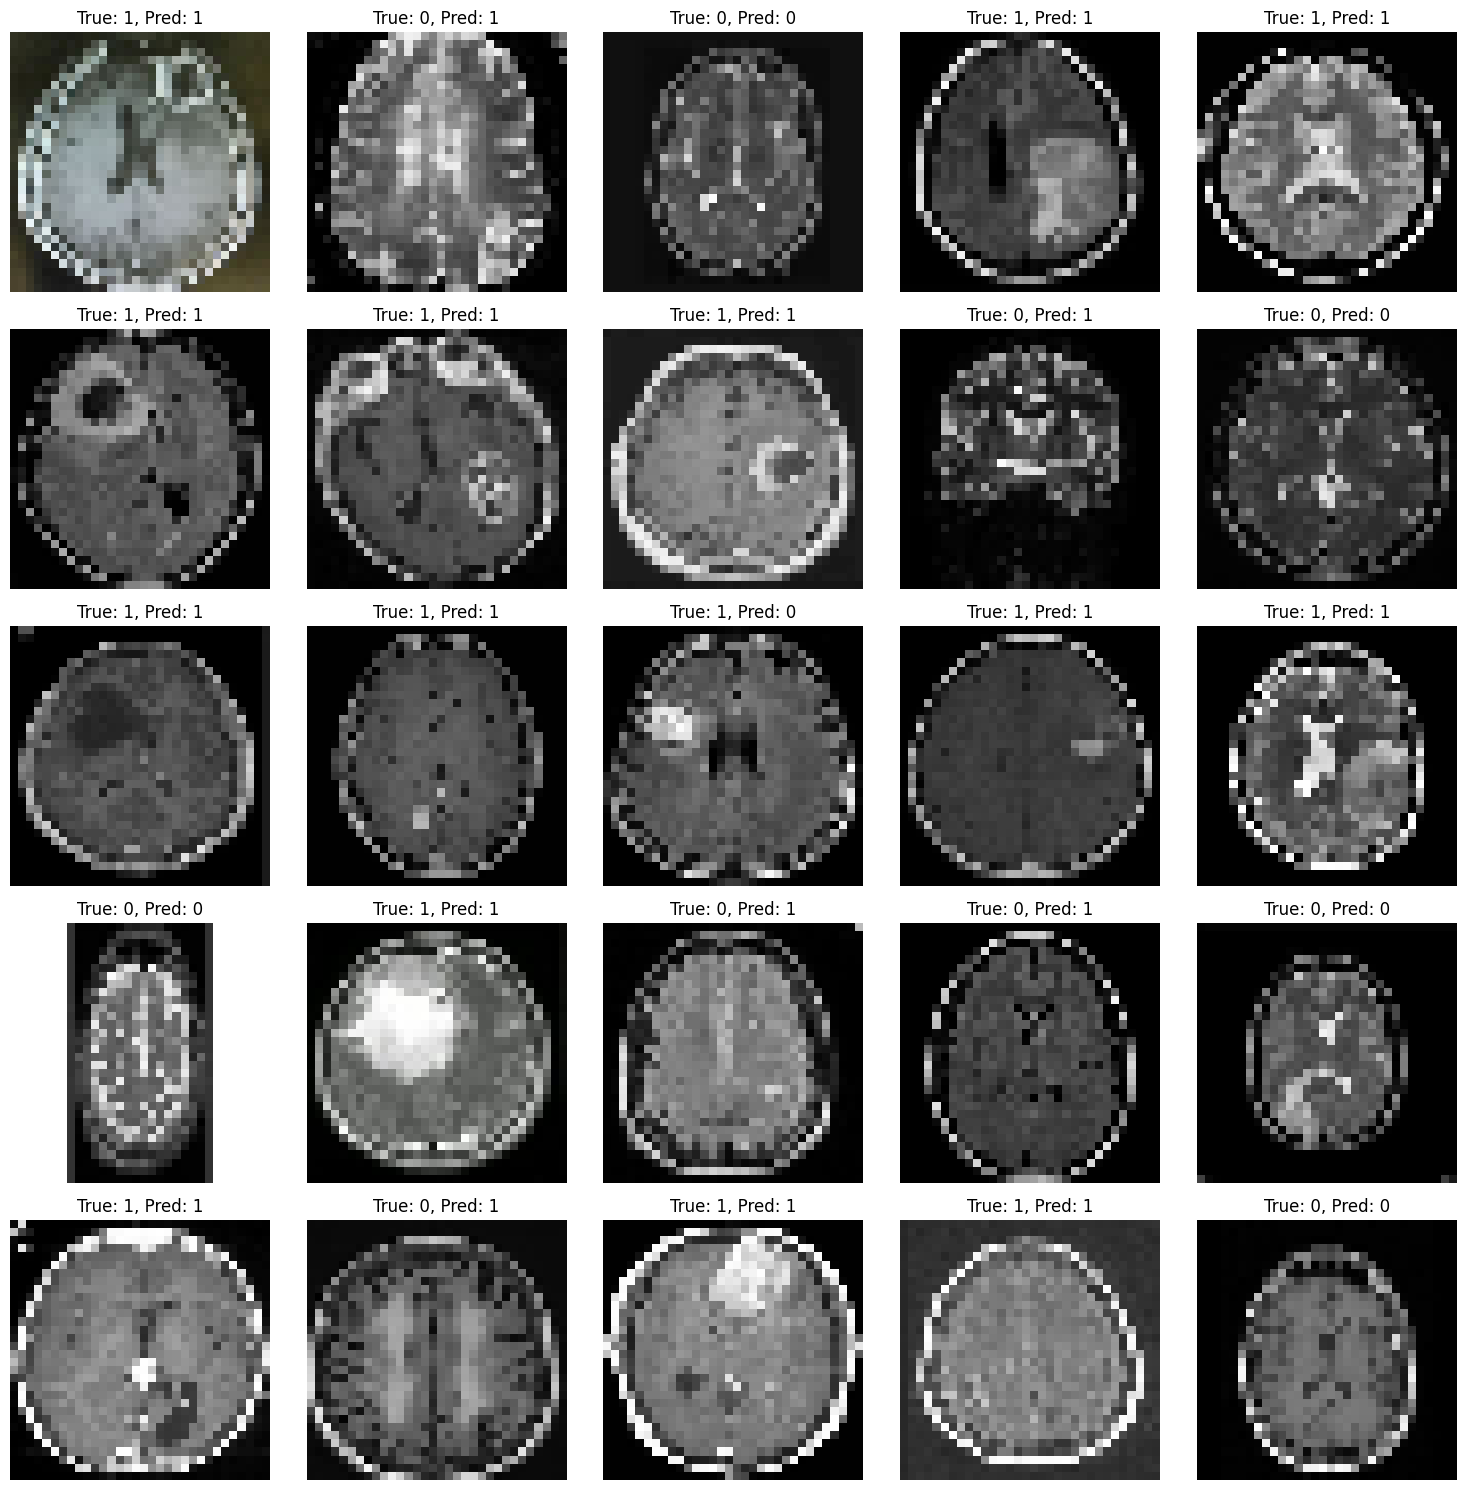

In [ ]:
# Display 25 test images along with their true and predicted labels
rows = 5
cols = 5
num_images = rows * cols

fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
for i in range(num_images):
    row = i // cols
    col = i % cols
    axes[row, col].imshow(test_images[i].astype(np.uint8))  # Display test images
    axes[row, col].set_title(f"True: {test_labels[i]}, Pred: {predicted_labels[i]}")
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()
